In [20]:
import pickle
import os

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../../src/")

from classifiers.features import get_distances

# D and D' as pseudo-inverses

In [2]:
x = np.linspace(0, 1)
y = np.linspace(0, 1)

In [3]:
def f(x, y): return (x**2 + y**2) / (y**2 + x*y)

In [4]:
z = [f(x_, y_) for x_ in x for y_ in y]
z = np.array(z).reshape(len(x), len(y))

/tmp/ipykernel_12568/1007960025.py:1: RuntimeWarning: invalid value encountered in double_scalars
  def f(x, y): return (x**2 + y**2) / (y**2 + x*y)
/tmp/ipykernel_12568/1007960025.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  def f(x, y): return (x**2 + y**2) / (y**2 + x*y)


Text(0.5, 1.0, "ln((2D-1) + D')")

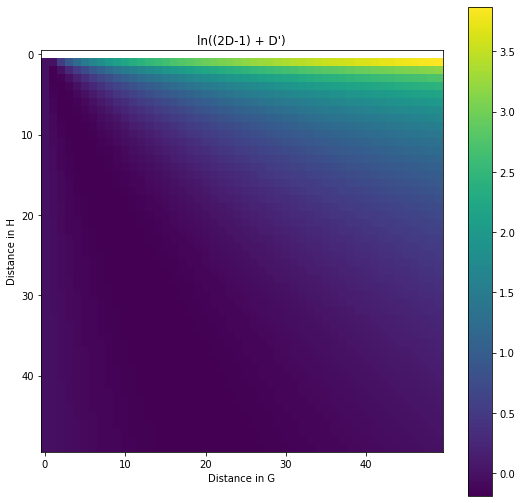

In [5]:
plt.figure(figsize=(9,9))

plt.imshow(np.log(np.transpose(z)))
plt.colorbar()

plt.xlabel("Distance in G")
plt.ylabel("Distance in H")
plt.title("ln((2D-1) + D\')")

# Separability of features

In [8]:
def D(x, y): return 2*((1/x) / ((1/x) + (1/y))) - 1
def Dprime(x, y): return x/(y + 1e-9)

In [12]:
caches = []
features = {}
for file in os.listdir("../../data/input/preprocessed/"):
    if "london" in file and file.endswith(".pkl"):
        # Load raw data
        with open("../../data/input/preprocessed/" + file, "rb") as _fh:
            data = pickle.load(_fh)
        data.embeddings = data.renormalize()
        caches.append(data)

        # Calculate feature form differences
        distances_G, distances_H = \
            get_distances(data.embeddings, list(data.observed_edges.keys()))
        feature_D = [D(distances_G[idx], distances_H[idx]) for idx in range(len(distances_G))]
        feature_Dprime = [Dprime(distances_G[idx], distances_H[idx]) for idx in range(len(distances_G))]
        labels = list(data.observed_edges.values())

        features[data.theta] = [feature_D, feature_Dprime, labels]
    else:
        continue

In [17]:
features[0.68][0][:3]

[0.10368367198804518, 0.1282141255467122, 0.08884496109472972]

In [19]:
df = pd.DataFrame({"D": features[0.68][0], "Dprime": features[0.68][1], "label": features[0.68][2],})

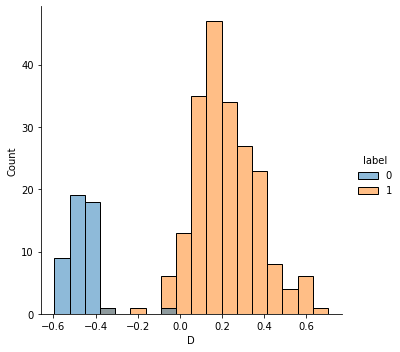

In [22]:
sns.displot(data=df, x="D", hue="label")

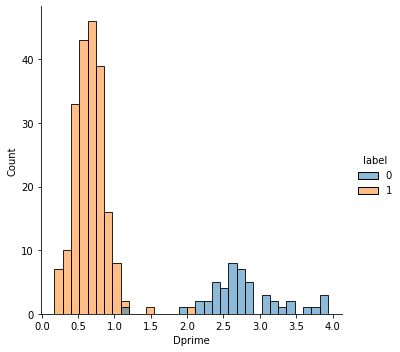

In [23]:
sns.displot(data=df, x="Dprime", hue="label")